**Rocks Classifictions**

**Import important library and Function**

In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import cv2

import seaborn as sns
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import (
    Dense,
    Activation,
    Dropout,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
)
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential

sns.set_style("darkgrid")
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory

**Define function for deleting Corupted Image**

In [2]:
def del_corupted_images(filename):
    del_count = 0
    if os.path.isfile(filename):
        try:
            fobj = open(filename, "rb")
            is_JFIF = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()
        if not is_JFIF:
            del_count += 1
    return del_count

**Delete the Image Repeated Exactly**

In [4]:
import hashlib


def del_shw_RepIm(path):
    os.chdir(path)
    files_list = os.listdir()
    duplicates = []
    hash_keys = dict()
    for index, filename in enumerate(
        os.listdir(".")
    ):  # listdir('.') = current directory
        if os.path.isfile(filename):
            with open(filename, "rb") as f:
                filehash = hashlib.md5(f.read()).hexdigest()

            if filehash not in hash_keys:
                hash_keys[filehash] = index
                if del_corupted_images(path + "/" + filename) != 1:
                    filepaths.append(path + "/" + filename)
                    labels.append(lab)
            else:
                duplicates.append((index, hash_keys[filehash]))

    for file_indexes in duplicates:
        try:

            plt.subplot(121), plt.imshow(plt.imread(files_list[file_indexes[1]]))
            plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

            plt.subplot(122), plt.imshow(plt.imread(files_list[file_indexes[0]]))
            plt.title(str(file_indexes[0]) + " duplicate"), plt.xticks([]), plt.yticks(
                []
            )
            plt.show()

        except OSError as e:
            print(error)
            continue

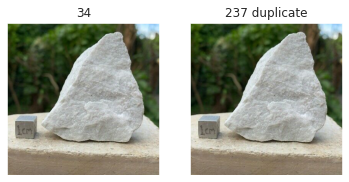

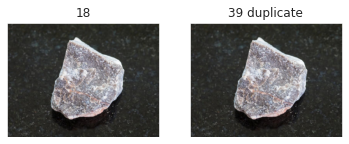

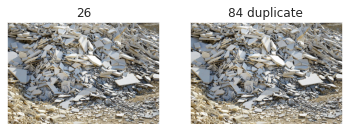

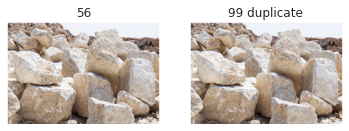

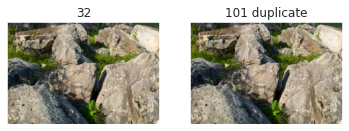

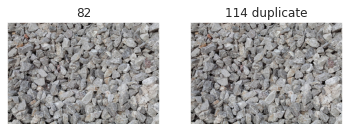

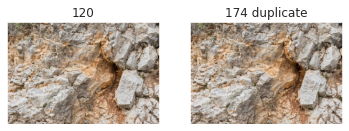

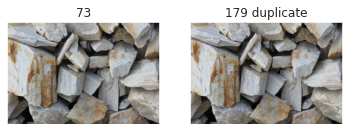

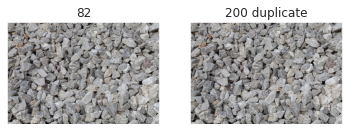

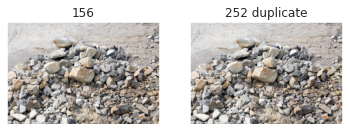

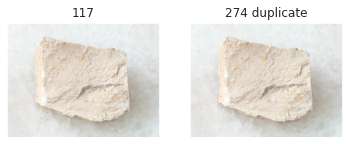

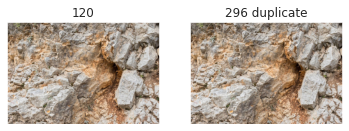

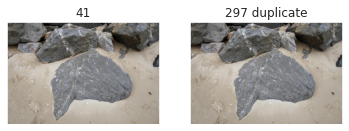

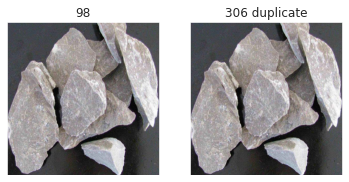

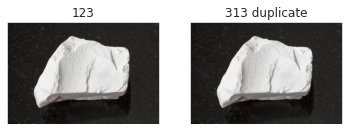

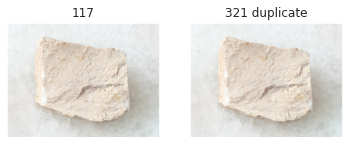

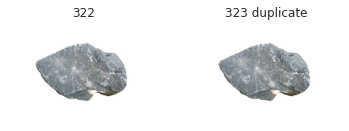

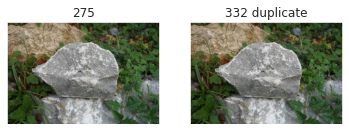

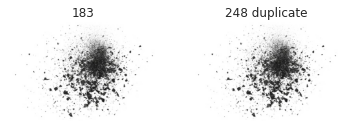

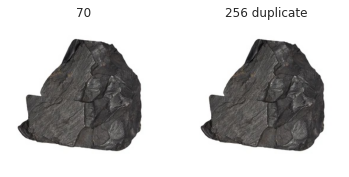

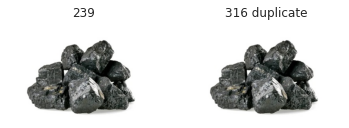

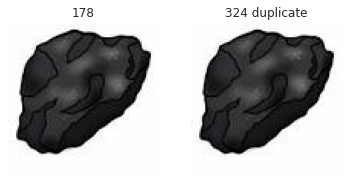

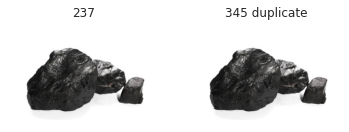

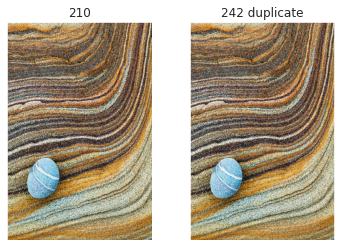

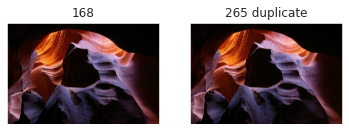

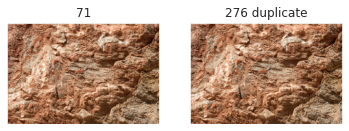

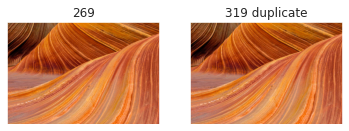

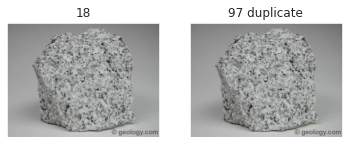

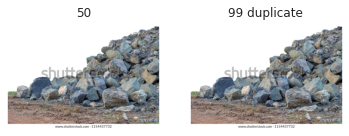

In [5]:
path = "/kaggle/input/rock-classification/Dataset"
filepaths = []
labels = []

for sub_path in os.listdir(path):
    for lab in os.listdir(path + "/" + sub_path):
        del_shw_RepIm(path + "/" + sub_path + "/" + lab)

In [6]:
print("filepaths: ", len(filepaths), "   labels: ", len(labels))
pd.Series(labels).value_counts()

filepaths:  1916    labels:  1916


Quartzite    473
Marble       383
Coal         349
Sandstone    317
Limestone    257
Basalt        72
Granite       65
dtype: int64

**Delete duplicated images use CNN from imagededup**

In [7]:
!pip install imagededup
# please note this package - imagededup was custom-installed in this kernel
from imagededup.methods import CNN
from imagededup.utils import plot_duplicates
import pandas as pd
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = (20, 20)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 52.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for imagededup: filename=imagededup-0.3.1-cp37-cp37m-linux_x86_64.whl size=188001 sha256=6ad4bbf7fdba42322953cc659318339ccecbcd05101cfb66b450392e5dad838c
  Stored in directory: /root/.cache/pip/wheels/78/b4/b9/1ac1ce9eab447ea20413fe24618d2e541e0e76fd725b0379b4
Successfully built imagededup


In [8]:
cnn = CNN()

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth


  0%|          | 0.00/9.83M [00:00<?, ?B/s]

2024-10-06 08:53:38,624: INFO Initialized: MobileNet v3 pretrained on ImageNet dataset sliced at GAP layer
2024-10-06 08:53:38,699: INFO Device set to cuda ..


In [9]:
for sub_path in os.listdir(path):
    for lab in os.listdir(path + "/" + sub_path):
        dir = path + "/" + sub_path + "/" + lab
        encodings = cnn.encode_images(image_dir=dir)
        duplicate = cnn.find_duplicates_to_remove(
            image_dir=dir, min_similarity_threshold=0.9499
        )
        for indx, path_img in enumerate(filepaths):
            if path_img.split("/")[-2] == lab:
                for namImg in duplicate:
                    if dir + "/" + namImg == path_img:
                        filepaths.pop(indx)
                        labels.pop(indx)

2024-10-06 08:53:44,986: INFO Start: Image encoding generation
2024-10-06 08:53:53,699: INFO End: Image encoding generation
2024-10-06 08:53:53,719: INFO Start: Image encoding generation
2024-10-06 08:53:56,013: INFO End: Image encoding generation
2024-10-06 08:53:56,034: INFO Start: Calculating cosine similarities...
2024-10-06 08:53:56,039: INFO End: Calculating cosine similarities.
2024-10-06 08:53:56,056: INFO Start: Image encoding generation
2024-10-06 08:53:59,066: INFO End: Image encoding generation
2024-10-06 08:53:59,082: INFO Start: Image encoding generation
2024-10-06 08:54:01,830: INFO End: Image encoding generation
2024-10-06 08:54:01,847: INFO Start: Calculating cosine similarities...
2024-10-06 08:54:01,850: INFO End: Calculating cosine similarities.
2024-10-06 08:54:01,860: INFO Start: Image encoding generation
2024-10-06 08:54:07,667: INFO End: Image encoding generation
2024-10-06 08:54:07,681: INFO Start: Image encoding generation
2024-10-06 08:54:13,194: INFO End: Im

In [11]:
print("filepaths: ", len(filepaths), "   labels: ", len(labels))

filepaths:  1859    labels:  1859


**Save the paths of images in data frame**

In [12]:
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
df = pd.concat([Fseries, Lseries], axis=1)

balance = df["labels"].value_counts()
print(balance)

Quartzite    469
Marble       376
Coal         320
Sandstone    311
Limestone    247
Basalt        71
Granite       65
Name: labels, dtype: int64


**Create file to save augement Image** 

In [13]:
pth = "/kaggle/working/new_Igneous"
os.chdir("/kaggle/working/")
if os.path.isfile(pth) == 0:
    os.mkdir(pth)

**Create new foder for 7 classes**

In [15]:
classes = ["Basalt", "Granite", "Marble", "Quartzite", "Coal", "Sandstone", "Limestone"]
for cls in classes:
    if os.path.isfile(pth + "/" + cls) == 0:
        os.mkdir(pth + "/" + cls)

**Delete the content for every classes** 

In [18]:
# for cls in classes:
#     if os.path.isfile(pth+'/'+cls) == 0 :
#         shutil.rmtree(pth+'/'+cls)

In [19]:
print("filepaths: ", len(filepaths), "   labels: ", len(labels))

filepaths:  1859    labels:  1859


**Copy image after delete Corupted , Repeated and duplicated images**

In [20]:
import os
import shutil

src_path = "/kaggle/input/rock-classification/Dataset"
dst_path = "/kaggle/working/new_Igneous"


# Move each jpg file to the destination directory
for file in filepaths:
    x = file.split("/")[-2:]
    shutil.copy(file, os.path.join(dst_path, x[0] + "/" + x[1]))

**Load training and validation sets and make augmentation**

In [21]:
# Load training and validation sets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dst_path,
    validation_split=0.2,
    subset="training",
    labels="inferred",
    label_mode="categorical",
    image_size=[224, 224],
    seed=123,
    interpolation="nearest",
    batch_size=64,
    shuffle=True,
)
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dst_path,
    validation_split=0.2,
    subset="validation",
    labels="inferred",
    label_mode="categorical",
    image_size=[224, 224],
    seed=123,
    interpolation="nearest",
    batch_size=64,
    shuffle=False,
)


# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label


AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = train_ds.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE)
ds_valid = valid_ds.map(convert_to_float).cache().prefetch(buffer_size=AUTOTUNE)

Found 1853 files belonging to 7 classes.
Using 1483 files for training.
Found 1853 files belonging to 7 classes.
Using 370 files for validation.


**Bulid the model**

In [22]:
model = Sequential()
model.add(Rescaling(1.0 / 255, input_shape=(224, 224, 3)))
model.add(Conv2D(16, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(7, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [23]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Set callback functions to early stop training
mycallbacks = [EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)]
hist = model.fit(train_ds, validation_data=valid_ds, epochs=50, callbacks=mycallbacks)

Epoch 1/50
24/24 [==============================] - 11s 230ms/step - loss: 1.9874 - accuracy: 0.3163 - val_loss: 1.3652 - val_accuracy: 0.4622
Epoch 2/50
24/24 [==============================] - 7s 203ms/step - loss: 1.4069 - accuracy: 0.5084 - val_loss: 1.1716 - val_accuracy: 0.5811
Epoch 3/50
24/24 [==============================] - 7s 225ms/step - loss: 1.2266 - accuracy: 0.5563 - val_loss: 1.0345 - val_accuracy: 0.6568
Epoch 4/50
24/24 [==============================] - 7s 201ms/step - loss: 1.1111 - accuracy: 0.6001 - val_loss: 0.6865 - val_accuracy: 0.7649
Epoch 5/50
24/24 [==============================] - 7s 201ms/step - loss: 1.0246 - accuracy: 0.6197 - val_loss: 0.4845 - val_accuracy: 0.8568
Epoch 6/50
24/24 [==============================] - 7s 202ms/step - loss: 0.8978 - accuracy: 0.6669 - val_loss: 0.3462 - val_accuracy: 0.8784
Epoch 7/50
24/24 [==============================] - 7s 197ms/step - loss: 0.7266 - accuracy: 0.7350 - val_loss: 0.6277 - val_accuracy: 0.7622
Epoch

**Evaluate the model**

In [25]:
model.evaluate(valid_ds)

6/6 [==============================] - 2s 298ms/step - loss: 0.1505 - accuracy: 0.9541


[0.15048781037330627, 0.954054057598114]